BARCO CASE: whether the patient will live more than 5 years

In [0]:
## mount to GD
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
## Access to TEAM4 Folder 

import os;os.listdir("/content/gdrive/Team Drives/Hackthon/Barco Dataset")

['Dataset',
 'cleanfile_1.csv',
 'Whitepapers',
 'Copy of cleanfile_1.csv',
 'cleanfile_2.csv',
 'cleanfile_3.csv',
 'cleanfile_4.csv']

In [0]:
## import basic library 
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
## ingest


data = pd.read_csv("/content/gdrive/Team Drives/Hackthon/Barco Dataset/cleanfile_4.csv")

In [0]:
data.head()

,Patient ID,Age recode with <1 year olds,Age at diagnosis,Year of diagnosis,Sex,Race/ethnicity,NHIA Derived Hisp Origin,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",State-county,...,Vital status recode (study cutoff used),Lived_5_and_above,Chemotherapy,Radiation_refused,Radiation_performed,Surgery_recommended_but_not_performed,Surgery_performed,Surgery_not_recommended,Surgery_status_unknown,cancer_stage_critical_level
0,9,45-49 years,47,1992,1,Laotian (1988+),Non-Spanish-Hispanic-Latino,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,CA: Alameda County (06001),...,Dead,1,0,0,1,0,0,0,1,1
1,47,35-39 years,39,1992,0,White,Non-Spanish-Hispanic-Latino,White,Non-Spanish-Hispanic-Latino,CA: Contra Costa County (06013),...,Dead,0,1,0,0,0,0,0,1,2
2,135,70-74 years,72,1989,0,White,Non-Spanish-Hispanic-Latino,White,Non-Spanish-Hispanic-Latino,CA: Alameda County (06001),...,Dead,0,0,0,0,0,0,0,1,2
3,191,65-69 years,67,1992,0,White,Non-Spanish-Hispanic-Latino,White,Non-Spanish-Hispanic-Latino,CA: San Francisco County (06075),...,Dead,0,1,0,1,0,0,0,1,2
4,206,80-84 years,81,1997,0,White,Non-Spanish-Hispanic-Latino,White,Non-Spanish-Hispanic-Latino,CA: San Francisco County (06075),...,Dead,0,0,0,0,0,0,1,1,0


In [0]:
data.shape

(933320, 33)

In [0]:
data.dtypes

Patient ID                                   int64
Age recode with <1 year olds                object
Age at diagnosis                             int64
Year of diagnosis                            int64
Sex                                          int64
Race/ethnicity                              object
NHIA Derived Hisp Origin                    object
Race recode (W, B, AI, API)                 object
Origin recode NHIA (Hispanic, Non-Hisp)     object
State-county                                object
Grade                                       object
Laterality                                  object
CS Tumor Size/Ext Eval (2004+)              object
CS Reg Node Eval (2004+)                    object
CS Mets Eval (2004+)                        object
Regional nodes examined (1988+)              int64
Regional nodes positive (1988+)              int64
Radiation sequence with surgery             object
Reason no cancer-directed surgery           object
Radiation recode               

In [0]:
list(data.columns.values)

['Patient ID',
 'Age recode with <1 year olds',
 'Age at diagnosis',
 'Year of diagnosis',
 'Sex',
 'Race/ethnicity',
 'NHIA Derived Hisp Origin',
 'Race recode (W, B, AI, API)',
 'Origin recode NHIA (Hispanic, Non-Hisp)',
 'State-county',
 'Grade',
 'Laterality',
 'CS Tumor Size/Ext Eval (2004+)',
 'CS Reg Node Eval (2004+)',
 'CS Mets Eval (2004+)',
 'Regional nodes examined (1988+)',
 'Regional nodes positive (1988+)',
 'Radiation sequence with surgery',
 'Reason no cancer-directed surgery',
 'Radiation recode',
 'Chemotherapy recode (yes, no/unk)',
 'Survival months',
 'COD to site rec KM',
 'Vital status recode (study cutoff used)',
 'Lived_5_and_above',
 'Chemotherapy',
 'Radiation_refused',
 'Radiation_performed',
 'Surgery_recommended_but_not_performed',
 'Surgery_performed',
 'Surgery_not_recommended',
 'Surgery_status_unknown',
 'cancer_stage_critical_level']

In [0]:
df = data.drop([
 
 'Patient ID',
 'Age recode with <1 year olds',
    'Race/ethnicity',
 'NHIA Derived Hisp Origin',
 'Race recode (W, B, AI, API)',
 'Origin recode NHIA (Hispanic, Non-Hisp)',
 'State-county',
 'Grade',
 'Laterality',
 'CS Tumor Size/Ext Eval (2004+)',
 'CS Reg Node Eval (2004+)',
 'CS Mets Eval (2004+)',
     'Radiation sequence with surgery',
 'Reason no cancer-directed surgery',
 'Radiation recode',
 'Chemotherapy recode (yes, no/unk)',
     'COD to site rec KM',
 'Vital status recode (study cutoff used)',
    ], axis = 1)
df.head()


,Age at diagnosis,Year of diagnosis,Sex,Regional nodes examined (1988+),Regional nodes positive (1988+),Survival months,Lived_5_and_above,Chemotherapy,Radiation_refused,Radiation_performed,Surgery_recommended_but_not_performed,Surgery_performed,Surgery_not_recommended,Surgery_status_unknown,cancer_stage_critical_level
0,47,1992,1,18,0,147.0,1,0,0,1,0,0,0,1,1
1,39,1992,0,1,1,20.0,0,1,0,0,0,0,0,1,2
2,72,1989,0,0,98,2.0,0,0,0,0,0,0,0,1,2
3,67,1992,0,0,98,32.0,0,1,0,1,0,0,0,1,2
4,81,1997,0,99,99,0.0,0,0,0,0,0,0,1,1,0


In [0]:
## NA value
df.isnull().sum() 

Age at diagnosis                             0
Year of diagnosis                            0
Sex                                          0
Regional nodes examined (1988+)              0
Regional nodes positive (1988+)              0
Survival months                          21672
Lived_5_and_above                            0
Chemotherapy                                 0
Radiation_refused                            0
Radiation_performed                          0
Surgery_recommended_but_not_performed        0
Surgery_performed                            0
Surgery_not_recommended                      0
Surgery_status_unknown                       0
cancer_stage_critical_level                  0
dtype: int64

In [0]:
## delete nul-value
df1 = df.dropna()
df1.shape

(911648, 15)

Text(0.5, 1.0, 'Distribution of Survival months')

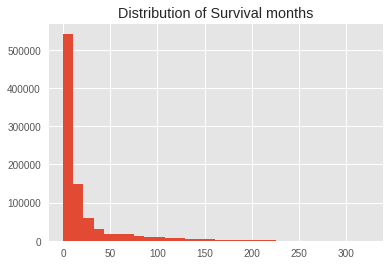

In [0]:
#bins = np.arange(surv.min(), surv.max(), 10)
plt.hist(x = df1["Survival months"], bins = 30)
plt.title("Distribution of Survival months")

# **CORRELATION**

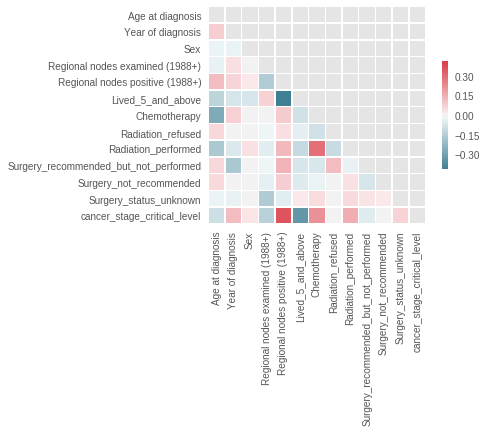

In [0]:

# Compute the correlation matrix
df2 = df1.drop(['Survival months', "Surgery_performed" ], axis = 1)
corr=df2.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
## download df2.scv to local machine to calculate p-value and t-statistics in R
df2.to_csv("df2.csv", index=False)
from google.colab import files
files.download("df2.csv")

In [0]:
pd.DataFrame(df2.corr()['Lived_5_and_above'].sort_values(ascending = True))

,Lived_5_and_above
Regional nodes positive (1988+),-0.416422
cancer_stage_critical_level,-0.332265
Age at diagnosis,-0.129134
Radiation_performed,-0.109676
Chemotherapy,-0.083421
Year of diagnosis,-0.071698
Surgery_recommended_but_not_performed,-0.069571
Sex,-0.069370
Surgery_not_recommended,-0.052094
Radiation_refused,-0.037298


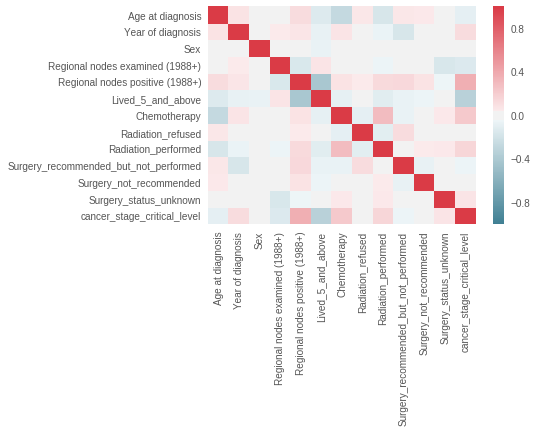

In [0]:
corr3 =df2.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr3, cmap = cmap,
            xticklabels=corr3.columns.values,
            yticklabels=corr3.columns.values)

In [0]:
## DEPENDENT / INDEPENDENT VARIABLE SELECTION

X = df1.drop(['Survival months', "Lived_5_and_above"], axis = 1)
y = df1["Lived_5_and_above"]
X.head(), y.head()


(   Age at diagnosis  Year of diagnosis  Sex  Regional nodes examined (1988+)  \
 0                47               1992    1                               18   
 1                39               1992    0                                1   
 2                72               1989    0                                0   
 3                67               1992    0                                0   
 4                81               1997    0                               99   
 
    Regional nodes positive (1988+)  Chemotherapy  Radiation_refused  \
 0                                0             0                  0   
 1                                1             1                  0   
 2                               98             0                  0   
 3                               98             1                  0   
 4                               99             0                  0   
 
    Radiation_performed  Surgery_recommended_but_not_performed  \
 0          

In [0]:
## SPLIT the data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)
X_train.shape, y_train.shape


((729318, 13), (729318,))

# **MODELLING **

![alt text](https://scikit-learn.org/stable/_static/ml_map.png)

##MODELING with RANDOM FOREST 

In [0]:
## 1MODELING with RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier


In [0]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
prediction = pd.DataFrame({
        "5 yrs_fact": y_test,
        "5 yrs predicted": predictions
    })

In [0]:
prediction.shape

(182330, 2)

In [0]:
clf.score(X_test, y_test)

0.8956178357922449

## **The accuracy of the Random Forest classification is 89%**

In [0]:
prediction.head(10)

,5 yrs predicted,5 yrs_fact
117290,0,0
477061,0,0
63309,0,0
417915,0,0
735904,0,0
728084,0,0
65573,0,0
764133,0,0
455565,0,0
65054,0,0


In [0]:
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:

## CONFUSION MATRIX

from yellowbrick.classifier import ConfusionMatrix

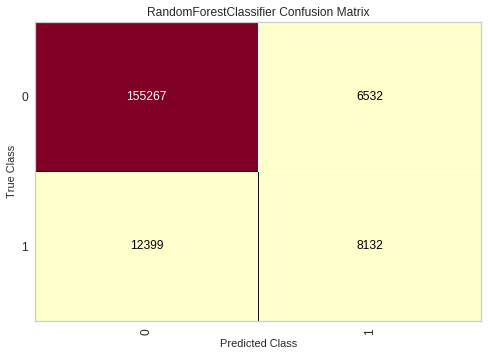

In [0]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

##MODELING with LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


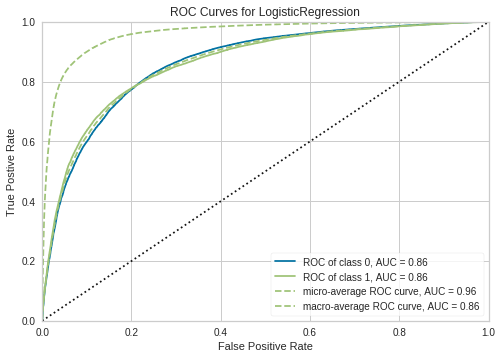

In [0]:
from yellowbrick.classifier import ROCAUC
clf2= LogisticRegression()
classes=[0,1]

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(clf2, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

The ROC curves for Logistic Regression classifier are concentrated in the top left corner, which means that true positive rate is almost one while a false positive rate is almost zero. 

The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

WE also test p-value and z-value. all of the features are statistically significant



In [0]:
clf2.score(X_test, y_test)

0.900153567706905

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


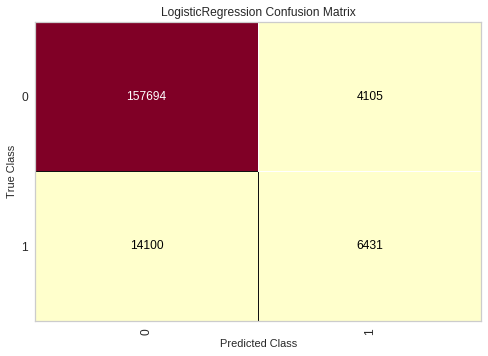

In [0]:
cm2 = ConfusionMatrix(clf2, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm2.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm2.score(X_test, y_test)

# How did we do?
cm2.poof()

## **The accuracy of the  Logistic Regression classification is 90%**




## **SCIKIT- LEARN  cheat sheet recomended SGD Classifier. **
##MODELING with SGD CLASSIFIER

In [0]:
## SGD CLASSIFIER AS 
from sklearn.linear_model import SGDClassifier
clf3 = SGDClassifier()
# fit (train) the classifier
clf3.fit(X_train, y_train)
predictions = clf3.predict(X_test)
prediction = pd.DataFrame({
        "5 yrs_fact": y_test,
        "5 yrs predicted": predictions
    })

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
clf3.score(X_test, y_test)

0.8873964789118631

## **The accuracy of the SGD classification is 89%**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


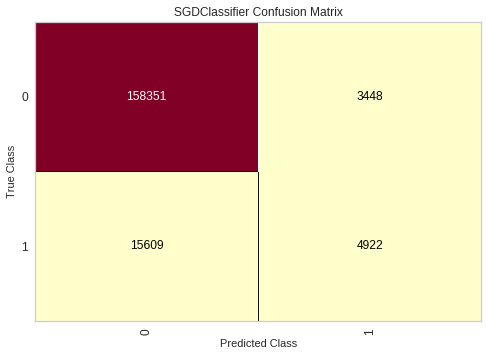

In [0]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf3, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [0]:
print (clf3.coef_)
print (clf3.intercept_)

[[-4.74368137e+01  4.98411416e+00 -8.93850705e+01  4.38645911e-01
  -6.96131061e+01 -8.49876453e+01 -6.86755004e+00 -9.01417347e+01
  -1.18873042e+01  0.00000000e+00 -9.51313320e+00  2.08082654e+00
  -4.39775424e+02]]
[-1.4500308]


SGD  classifier model is more "pessimistic":  meaning "FALSE POSITIVE" rate is higher comparing to RANDOM FOREST models
RANDOM FOREST  classifier model is more optimisitc than SGD:  meaning more "FALSE NEGATIVE" is higher than in SGD classifier

# **RECOMMENDATION**: The end user of this prediction model should decide which one is more appropriate: pessimistic approach (overestimate the risk of cancer)  or optimistic (underestimate the risk of cancer)
